# **Types of CNN**

## ***1. LeNet-5***




In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

2023-02-10 00:23:06.471761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 00:23:07.190930: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-10 00:23:07.190961: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-10 00:23:09.298178: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import numpy as np

def plot_images_sample(X, Y):
    # Draw plot for images sample
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

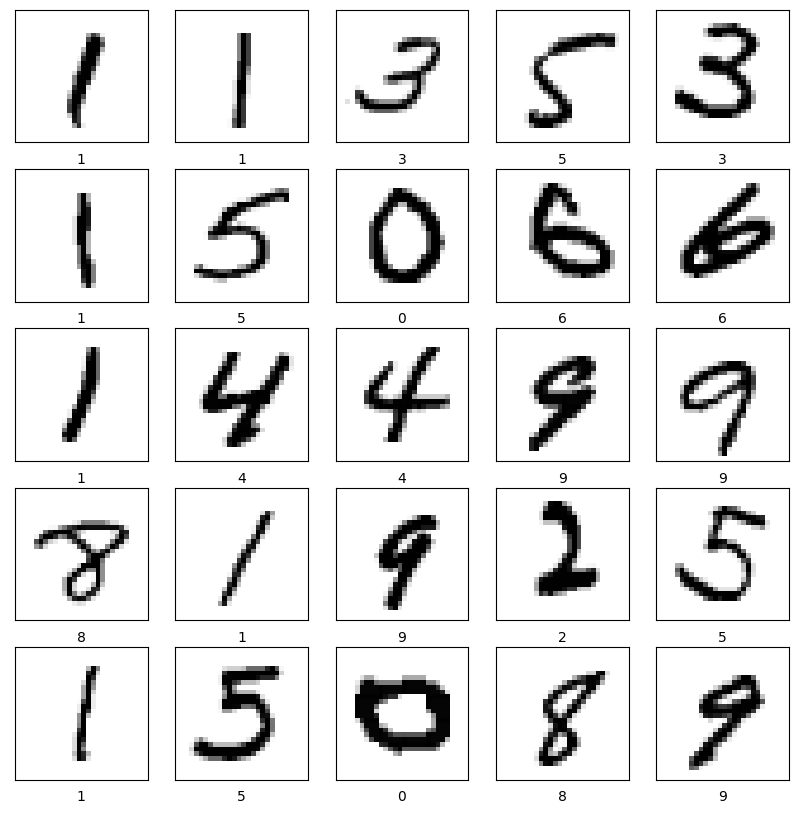

In [4]:
# Draw plot for images sample
plot_images_sample(x_train,y_train)

In [5]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [6]:
# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# Add the first subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Add the second subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

2023-02-10 00:23:25.038041: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-10 00:23:25.038961: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-10 00:23:25.038993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (766ff1c934e2): /proc/driver/nvidia/version does not exist
2023-02-10 00:23:25.040360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Flatten the output from the subsampling layers
model.add(Flatten())

# Add the fully connected layer
model.add(Dense(units=120, activation='relu'))

# Add the final fully connected layer
model.add(Dense(units=84, activation='relu'))

# Add the output layer
model.add(Dense(units=10, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.3030 - accuracy: 0.9114 - val_loss: 0.1008 - val_accuracy: 0.9666
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0872 - accuracy: 0.9731 - val_loss: 0.0735 - val_accuracy: 0.9747
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0638 - accuracy: 0.9808 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0465 - val_accuracy: 0.9829
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0356 - val_accuracy: 0.9877
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0358 - val_accuracy: 0.9889
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0347 - val_accuracy: 0.9880
Epo

In [9]:
# Evaluate the model
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9896
Test loss: 0.033520206809043884
Test accuracy: 0.9896000027656555


313/313 - 1s - loss: 0.0335 - accuracy: 0.9896 - 924ms/epoch - 3ms/step


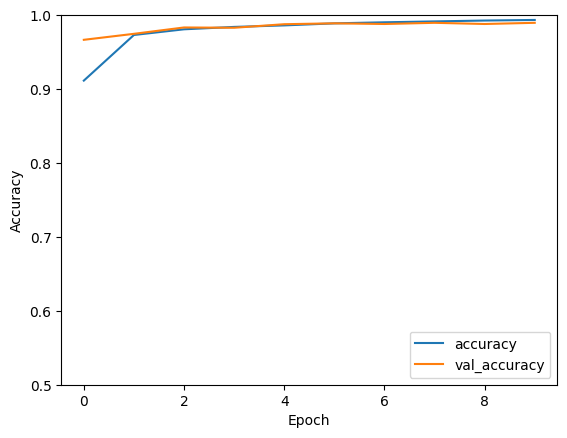

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

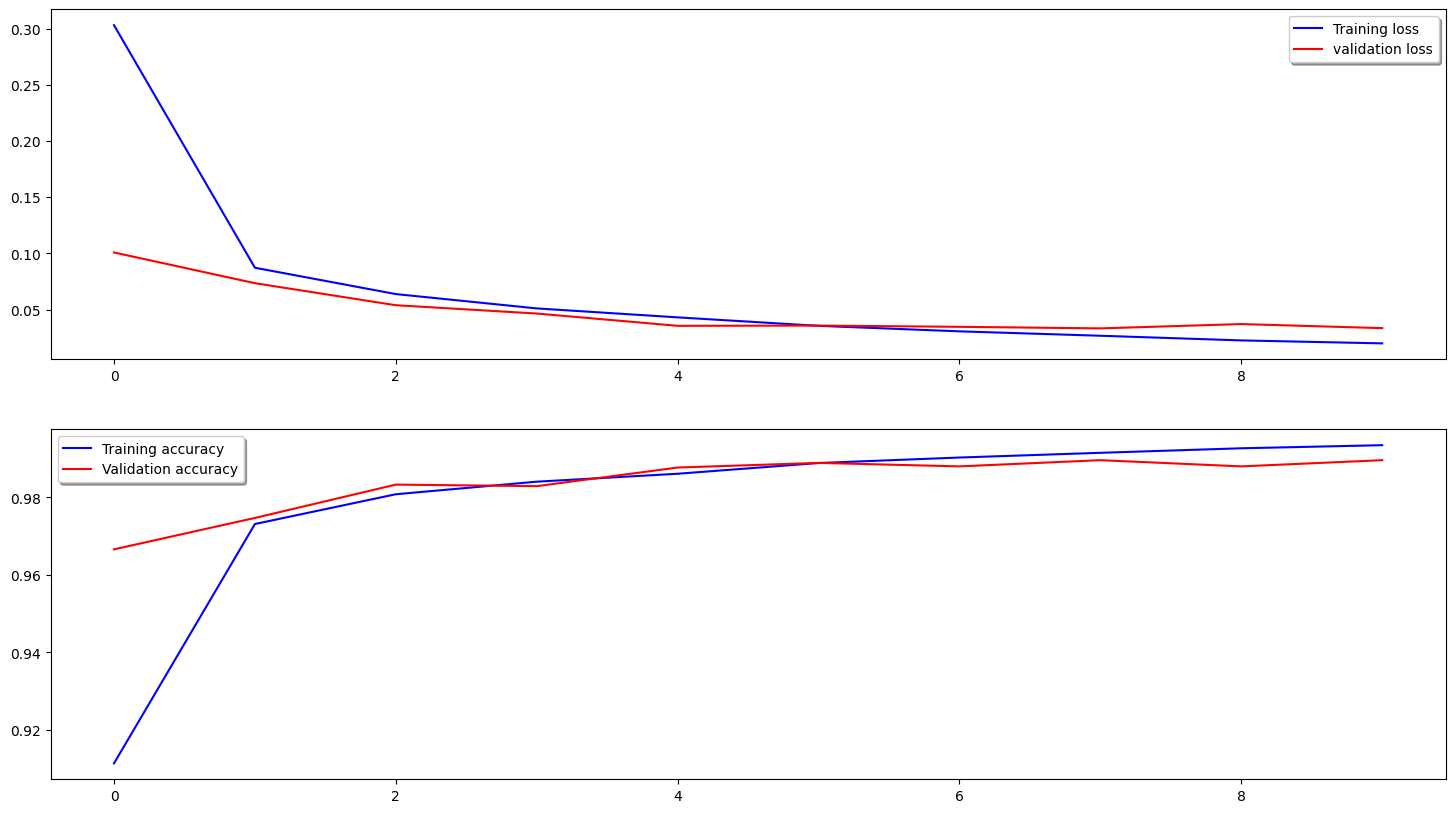

In [11]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
def get_predictions(X_test):
    # Digits prediction
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    return predictions

313/313 [==============================] - 1s 3ms/step


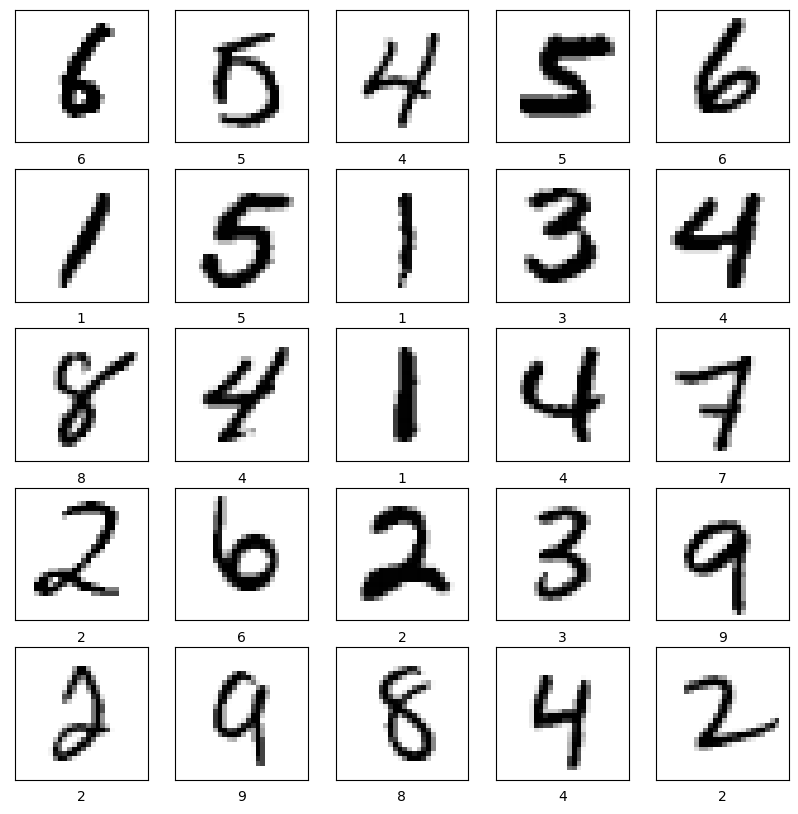

In [13]:
# Prediction and display it
predictions = get_predictions(x_test)
plot_images_sample(x_test, predictions)

# ***2. AlexNet***

In [14]:
# Define the AlexNet model
from keras.layers import Dense, Dropout, Flatten
model_alex = Sequential()
model_alex.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_alex.add(MaxPooling2D(pool_size=(2, 2)))
model_alex.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model_alex.add(Flatten())
model_alex.add(Dense(128, activation='relu'))
model_alex.add(Dropout(0.5))
model_alex.add(Dense(10, activation='softmax'))

In [16]:
# Compile the model
model_alex.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# Train the model
history_alexnet = model_alex.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 8s 17ms/step - loss: 2.2970 - accuracy: 0.1198 - val_loss: 2.2676 - val_accuracy: 0.1427
Epoch 2/12
469/469 [==============================] - 9s 18ms/step - loss: 2.2601 - accuracy: 0.1510 - val_loss: 2.2327 - val_accuracy: 0.1563
Epoch 3/12
469/469 [==============================] - 7s 15ms/step - loss: 2.2276 - accuracy: 0.1917 - val_loss: 2.2005 - val_accuracy: 0.1928
Epoch 4/12
469/469 [==============================] - 8s 16ms/step - loss: 2.1975 - accuracy: 0.2375 - val_loss: 2.1684 - val_accuracy: 0.3092
Epoch 5/12
469/469 [==============================] - 7s 15ms/step - loss: 2.1676 - accuracy: 0.2828 - val_loss: 2.1349 - val_accuracy: 0.4355
Epoch 6/12
469/469 [==============================] - 7s 15ms/step - loss: 2.1336 - accuracy: 0.3282 - val_loss: 2.0981 - val_accuracy: 0.5256
Epoch 7/12
469/469 [==============================] - 10s 21ms/step - loss: 2.0966 - accuracy: 0.3673 - val_loss: 2.0574 - val_accuracy: 0.575

In [17]:
# Evaluate the model on the test data
score = model_alex.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.787682056427002
Test accuracy: 0.7113999724388123


313/313 - 1s - loss: 1.7877 - accuracy: 0.7114 - 984ms/epoch - 3ms/step


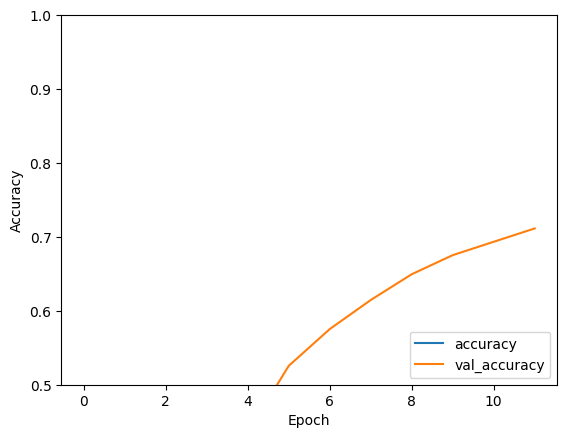

In [18]:
plt.plot(history_alexnet.history['accuracy'], label='accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model_alex.evaluate(x_test, y_test, verbose=2)

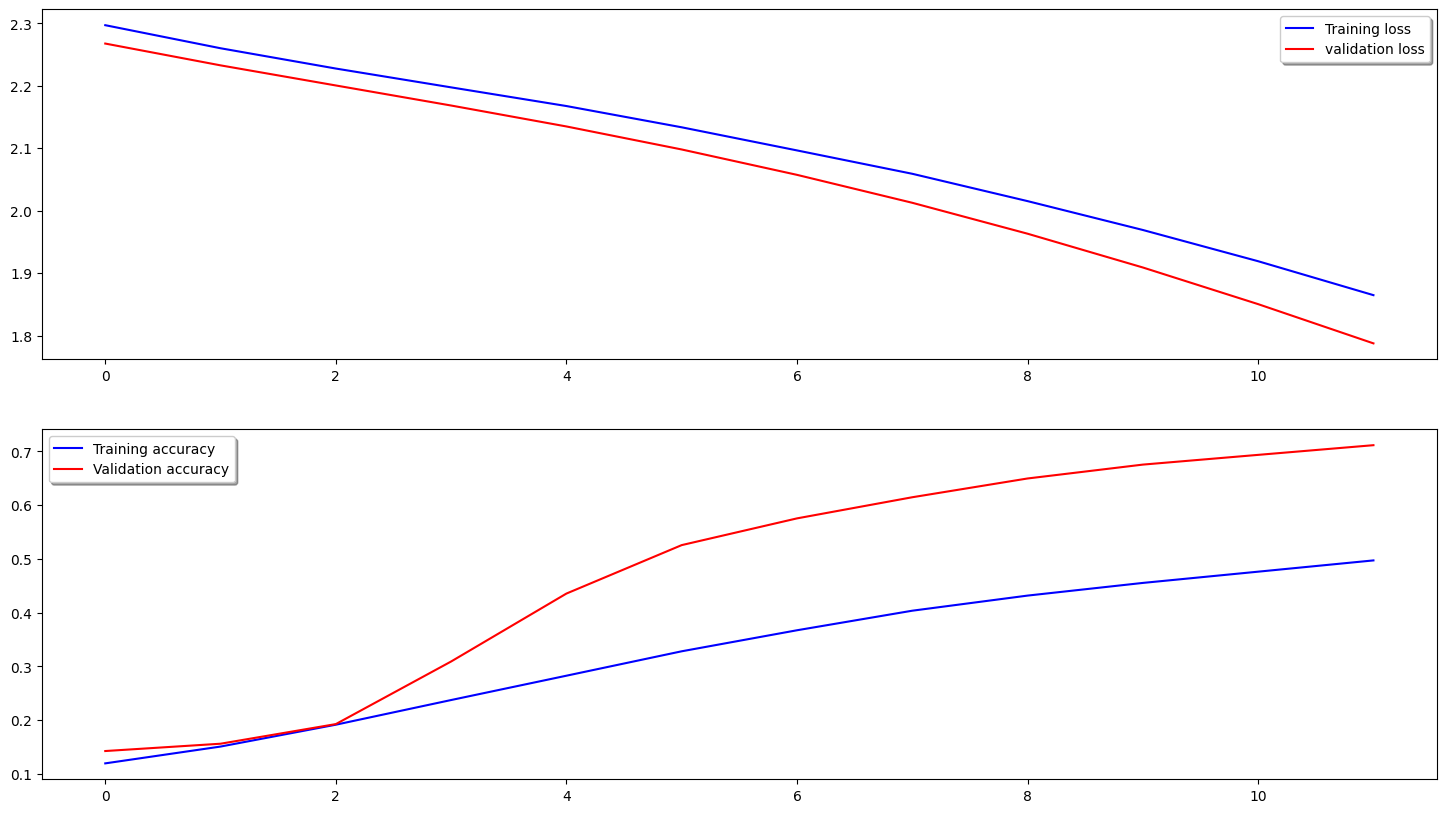

In [21]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history_alexnet.history['loss'], color='b', label="Training loss")
ax[0].plot(history_alexnet.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_alexnet.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_alexnet.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [22]:
def get_predictions(X_test):
    # Digits prediction
    predictions_alex = model_alex.predict(X_test)
    predictions_alex = np.argmax(predictions_alex, axis=1)
    return predictions_alex

313/313 [==============================] - 1s 3ms/step


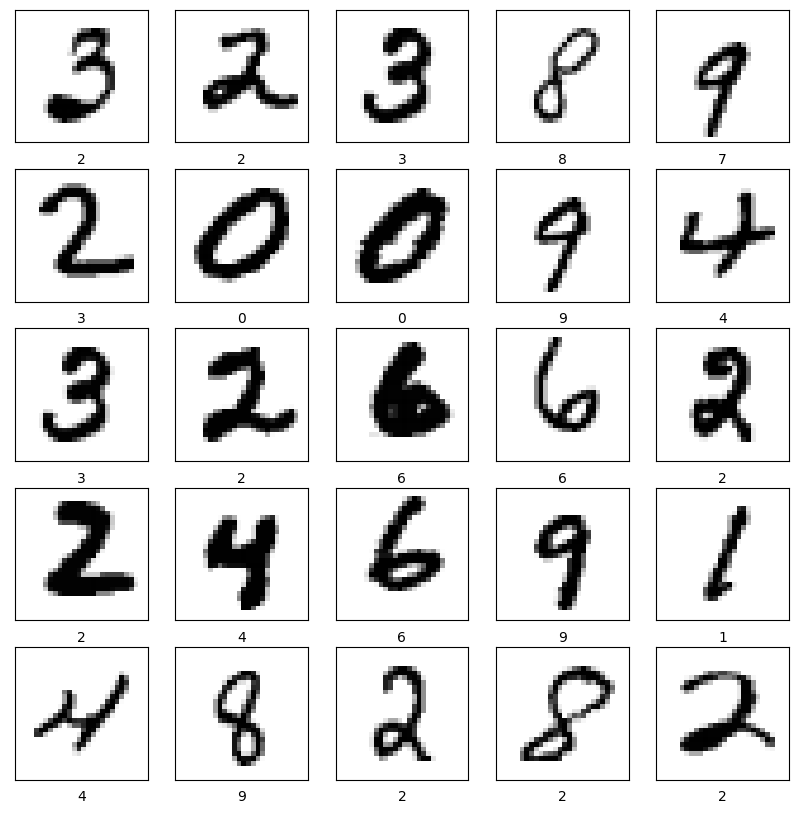

In [23]:
# Prediction and display it
predictions_alex = get_predictions(x_test)
plot_images_sample(x_test, predictions_alex)

# ***3. ZFNet***

In [22]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras

# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Preprocess the data
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# # Reshape the data from (28, 28) to (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

# # Convert the labels from integers to one-hot vectors
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

# # Define the model architecture
# model_zfnet = keras.Sequential([
#     keras.layers.Conv2D(96, (7, 7), activation='relu', padding='same', input_shape=(28, 28, 1)),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
#     keras.layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
#     keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [23]:
# # Compile the model
# model_zfnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history_zfnet = model_zfnet.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# # Evaluate the model on the test data
# test_loss, test_acc = model_zfnet.evaluate(x_test, y_test, verbose=0)
# print('Test accuracy:', test_acc)

In [24]:
# # Evaluate the model on the test data
# score_zf = model_zfnet.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# ***3. VGGNet***

In [26]:
from keras.optimizers import Adam

# build the model
model_vggnet = Sequential()
model_vggnet.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model_vggnet.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vggnet.add(MaxPooling2D(pool_size=(2,2)))
model_vggnet.add(Dropout(0.25))
model_vggnet.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vggnet.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vggnet.add(MaxPooling2D(pool_size=(2,2)))
model_vggnet.add(Dropout(0.25))
model_vggnet.add(Flatten())
model_vggnet.add(Dense(512, activation='relu'))
model_vggnet.add(Dropout(0.5))
model_vggnet.add(Dense(10, activation='softmax'))


In [34]:
# compile the model
model_vggnet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model
history_vggnet = model_vggnet.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 29s 60ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 2.3062 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 2.3057 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 2.3067 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 2.3060 - val_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 2.3081 - val_accuracy: 0.1135
Epoch 6/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 2.3067 - val_accuracy: 0.1135
Epoch 7/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 2.3069 - val_accuracy:

In [35]:
# Evaluate the model on the test data
score = model_vggnet.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.310544967651367
Test accuracy: 0.11349999904632568


313/313 - 2s - loss: 2.3105 - accuracy: 0.1135 - 2s/epoch - 6ms/step


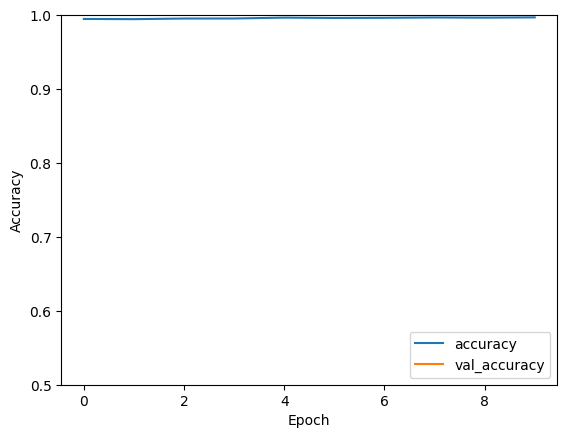

In [36]:
plt.plot(history_vggnet.history['accuracy'], label='accuracy')
plt.plot(history_vggnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model_vggnet.evaluate(x_test, y_test, verbose=2)

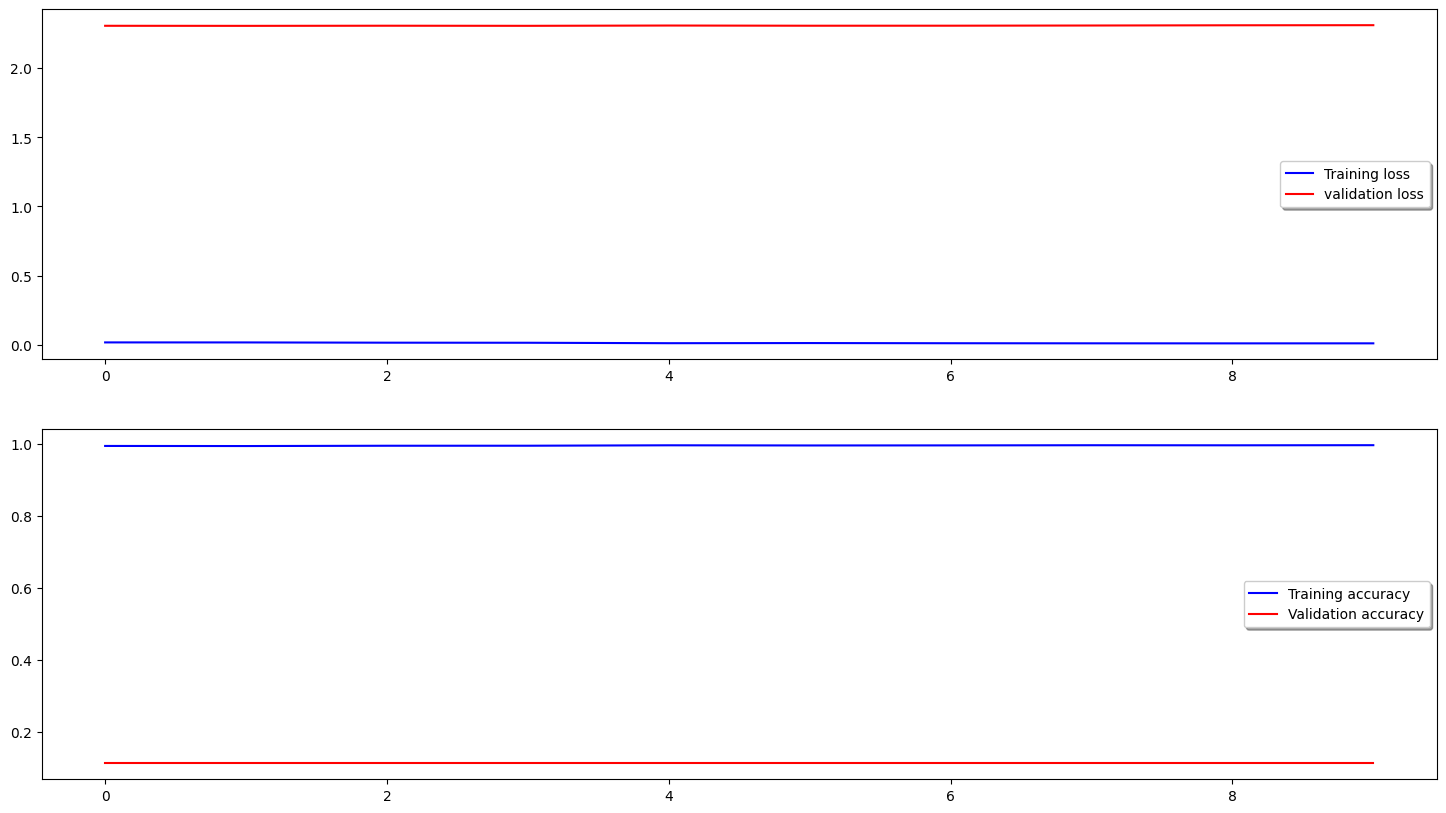

In [37]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history_vggnet.history['loss'], color='b', label="Training loss")
ax[0].plot(history_vggnet.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_vggnet.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_vggnet.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [38]:
def get_predictions(X_test):
    # Digits prediction
    predictions_vggnet = model_vggnet.predict(X_test)
    predictions_vggnet = np.argmax(predictions_vggnet, axis=1)
    return predictions_vggnet

313/313 [==============================] - 2s 6ms/step


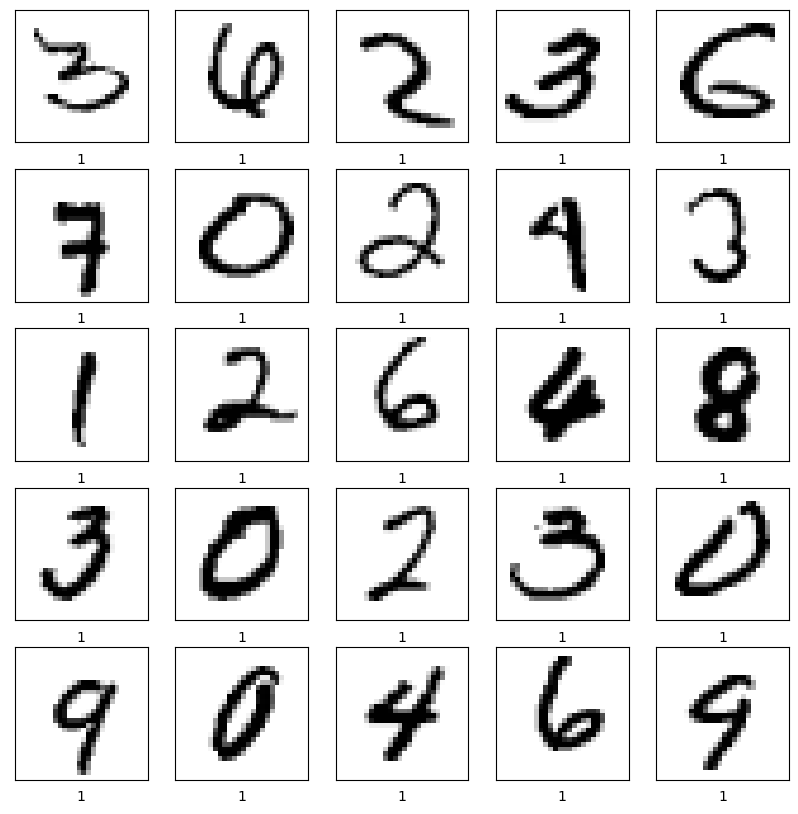

In [39]:
# Prediction and display it
predictions_vggnet = get_predictions(x_test)
plot_images_sample(x_test, predictions_vggnet)

# ***4. GoogLeNet***

In [41]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Model

input_img = Input(shape=(28, 28, 1))


# inception module 1
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

# inception module 2
tower_1 = Conv2D(128, (1,1), padding='same', activation='relu')(output)
tower_1 = Conv2D(128, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(128, (1,1), padding='same', activation='relu')(output)
tower_2 = Conv2D(128, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(output)
tower_3 = Conv2D(128, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)


In [42]:
# additional layers
output = AveragePooling2D((5,5), strides=(3,3), padding='valid')(output)
output = Flatten()(output)
output = Dense(1024, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(1024, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(10, activation='softmax')(output)

model_gnet = Model(inputs=input_img, outputs=output)


In [43]:
# compile the model
model_gnet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [44]:

# train the model
history_gnet = model_gnet.fit(x_train_16, y_train_16, batch_size=128, epochs=10, verbose=1, validation_data=(x_test_16, y_test_16))

Epoch 1/10


: 

: 

In [25]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input
import numpy as np

(x_train_16, y_train_16), (x_test_16, y_test_16) = mnist.load_data()

# Reshape the data to have a depth channel
x_train_16 = x_train_16.reshape((x_train_16.shape[0], 28, 28, 1))
x_test_16 = x_test.reshape((x_test_16.shape[0], 28, 28, 1))

# Convert the data to float32 and normalize it between 0 and 1
x_train_16 = x_train_16.astype('float32')
x_test = x_test.astype('float32')
x_train_16 /= 255
x_test /= 255

# Convert the labels to categorical
y_train_16 = keras.utils.to_categorical(y_train_16, 10)
y_test_16 = keras.utils.to_categorical(y_test_16, 10)

# Sample the data
sample_size = 20000
x_train_16 = x_train_16[:sample_size]
y_train_16 = y_train_16[:sample_size]

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add the first convolutional block
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Add the second convolutional block
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Add the fully connected layer
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Create the model
model_16 = Model(inputs=input_layer, outputs=x)

# Compile the model
model_16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_16 = model.fit(x_train_16, y_train_16, batch_size=32, epochs=10, validation_data=(x_test_16, y_test_16))


Epoch 1/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 2.3178 - val_accuracy: 0.1928
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 2.3282 - val_accuracy: 0.0892
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 2.3250 - val_accuracy: 0.0974
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 2.3307 - val_accuracy: 0.0995
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 2.3292 - val_accuracy: 0.0974
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 2.3345 - val_accuracy: 0.0974
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 2.3227 - val_accuracy: 0.0974
Epoch 

In [28]:
# Evaluate the model on the test data
score = model_16.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.30259108543396
Test accuracy: 0.1331000030040741
